# Import

In [1]:
import warnings
warnings.simplefilter('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
from bayesian_network import BayesianNetwork

# Prepare Data

| 英語 | 日本語 |
|------|--------|
| Survived | 生存 |
| Pclass | チケットクラス |
| Name | 名前 |
| Sex | 性別 |
| Age | 年齢 |
| SibSp | 兄弟姉妹/配偶者の数 |
| Parch | 親/子供の数 |
| Ticket | チケット番号 |
| Fare | 運賃 |
| Embarked | 乗船した港 |

In [4]:
df_original = pd.read_csv("./data/taitanic.csv")
df_original

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
categorical_columns = ["Survived", "Pclass", "Parch", "Sex", "Embarked"]
categorical_df = df_original.loc[:, [*categorical_columns]]
categorical_df.head()

,Survived,Pclass,Parch,Sex,Embarked
0,0,3,0,male,S
1,1,1,0,female,C
2,1,3,0,female,S
3,1,1,0,female,S
4,0,3,0,male,S


In [6]:
numerical_columns = ["Age", "Fare", "SibSp"]
numerical_df = df_original.loc[:, [*numerical_columns]]
numerical_df.head()

,Age,Fare,SibSp
0,22.0,7.2500,1
1,38.0,71.2833,1
2,26.0,7.9250,0
3,35.0,53.1000,1
4,35.0,8.0500,0


In [7]:
numerical_df['Age'] = numerical_df['Age'].fillna(numerical_df['Age'].mean())
numerical_df['Fare'] = numerical_df['Fare'].fillna(numerical_df['Fare'].mean())
numerical_df["SibSp"] = numerical_df["SibSp"].fillna(numerical_df["SibSp"].mean())
numerical_df.isna().sum()

Age      0
Fare     0
SibSp    0
dtype: int64

In [8]:
bin_df = pd.DataFrame([])
n_bin = 3
for name in numerical_df.columns:
    bin_df[name], _ = pd.cut(numerical_df[name], n_bin, labels=np.arange(n_bin)+1, retbins=True)
bin_df.head()

,Age,Fare,SibSp
0,1,1,1
1,2,1,1
2,1,1,1
3,2,1,1
4,2,1,1


In [9]:
bin_df = pd.concat([categorical_df, bin_df], axis=1)
bin_df.head()

,Survived,Pclass,Parch,Sex,Embarked,Age,Fare,SibSp
0,0,3,0,male,S,1,1,1
1,1,1,0,female,C,2,1,1
2,1,3,0,female,S,1,1,1
3,1,1,0,female,S,2,1,1
4,0,3,0,male,S,2,1,1


In [10]:
bin_df = bin_df.loc[:, bin_df.columns[::-1].to_numpy()]
bin_df = bin_df.dropna()
bin_df

,SibSp,Fare,Age,Embarked,Sex,Parch,Pclass,Survived
0,1,1,1,S,male,0,3,0
1,1,1,2,C,female,0,1,1
2,1,1,1,S,female,0,3,1
3,1,1,2,S,female,0,1,1
4,1,1,2,S,male,0,3,0
...,...,...,...,...,...,...,...,...
886,1,1,2,S,male,0,2,0
887,1,1,1,S,female,0,1,1
888,1,1,2,S,female,2,3,0
889,1,1,1,C,male,0,1,1


# Main

In [11]:
bayesian_network = BayesianNetwork(bin_df=bin_df, n_dim_total=3)

In [12]:
connect_df_dict = bayesian_network.analyze_connection()

                     DIM0                     
----------------------------------------------------
             Collect DisconnectionInfos             
----------------------------------------------------
SibSp , Fare | [] -> False [0.11]
SibSp , Age | [] -> True [0.00]
SibSp , Embarked | [] -> True [0.01]
SibSp , Sex | [] -> False [0.30]
SibSp , Parch | [] -> True [0.00]
SibSp , Pclass | [] -> True [0.00]
SibSp , Survived | [] -> True [0.00]
Fare , Age | [] -> False [0.54]
Fare , Embarked | [] -> True [0.00]
Fare , Sex | [] -> True [0.04]
Fare , Parch | [] -> True [0.00]
Fare , Pclass | [] -> True [0.00]
Fare , Survived | [] -> True [0.01]
Age , Embarked | [] -> True [0.00]
Age , Sex | [] -> True [0.04]
Age , Parch | [] -> True [0.00]
Age , Pclass | [] -> True [0.00]
Age , Survived | [] -> False [0.33]
Embarked , Sex | [] -> True [0.00]
Embarked , Parch | [] -> False [0.16]
Embarked , Pclass | [] -> True [0.00]
Embarked , Survived | [] -> True [0.00]
Sex , Parch | [] -> True [0.00]
S

In [13]:
closeness_df_dict = bayesian_network.analyze_closeness(target_col="Survived")

# Result

## Funcs

In [27]:
def highlight_cell(val):
    if val == 1:
        background_color = '#007700'
    elif val == 2:
        background_color = '#00aa00'
    elif val >= 3:
        background_color = '#00ff00'
    else:
        background_color = ''
    return f'background-color: {background_color}'

## Table

In [28]:
for label, connect_df in connect_df_dict.items():
    print(f"=========================== {label} ===========================")
    display(connect_df.astype(int).style.applymap(highlight_cell))
    print()

=========================== Init ===========================


,SibSp,Fare,Age,Embarked,Sex,Parch,Pclass,Survived
SibSp,0,1,1,1,1,1,1,1
Fare,0,0,1,1,1,1,1,1
Age,0,0,0,1,1,1,1,1
Embarked,0,0,0,0,1,1,1,1
Sex,0,0,0,0,0,1,1,1
Parch,0,0,0,0,0,0,1,1
Pclass,0,0,0,0,0,0,0,1
Survived,0,0,0,0,0,0,0,0



=========================== Level0 ===========================


,SibSp,Fare,Age,Embarked,Sex,Parch,Pclass,Survived
SibSp,0,0,1,1,0,1,1,1
Fare,0,0,0,1,1,1,1,1
Age,0,0,0,1,1,1,1,0
Embarked,0,0,0,0,1,0,1,1
Sex,0,0,0,0,0,1,1,1
Parch,0,0,0,0,0,0,0,1
Pclass,0,0,0,0,0,0,0,1
Survived,0,0,0,0,0,0,0,0



=========================== Level1 ===========================


,SibSp,Fare,Age,Embarked,Sex,Parch,Pclass,Survived
SibSp,0,0,1,0,0,1,1,1
Fare,0,0,0,0,0,0,1,1
Age,0,0,0,1,0,1,1,0
Embarked,0,0,0,0,0,0,1,1
Sex,0,0,0,0,0,1,1,1
Parch,0,0,0,0,0,0,0,1
Pclass,0,0,0,0,0,0,0,1
Survived,0,0,0,0,0,0,0,0



=========================== Level2 ===========================


,SibSp,Fare,Age,Embarked,Sex,Parch,Pclass,Survived
SibSp,0,0,1,0,0,1,0,1
Fare,0,0,0,0,0,0,1,1
Age,0,0,0,1,0,1,1,0
Embarked,0,0,0,0,0,0,1,1
Sex,0,0,0,0,0,1,1,1
Parch,0,0,0,0,0,0,0,1
Pclass,0,0,0,0,0,0,0,1
Survived,0,0,0,0,0,0,0,0



=========================== Level3 ===========================


,SibSp,Fare,Age,Embarked,Sex,Parch,Pclass,Survived
SibSp,0,0,1,0,0,1,0,1
Fare,0,0,0,0,0,0,1,1
Age,0,0,0,1,0,1,1,0
Embarked,0,0,0,0,0,0,1,1
Sex,0,0,0,0,0,1,1,1
Parch,0,0,0,0,0,0,0,1
Pclass,0,0,0,0,0,0,0,1
Survived,0,0,0,0,0,0,0,0


In [29]:
for label, closeness_df in closeness_df_dict.items():
    print(f"=========================== {label} ===========================")
    display(closeness_df.style.applymap(highlight_cell))
    print()

=========================== Init ===========================


,SibSp,Fare,Age,Embarked,Sex,Parch,Pclass,Survived
SibSp,0,2,2,2,2,2,2,1
Fare,0,0,2,2,2,2,2,1
Age,0,0,0,2,2,2,2,1
Embarked,0,0,0,0,2,2,2,1
Sex,0,0,0,0,0,2,2,1
Parch,0,0,0,0,0,0,2,1
Pclass,0,0,0,0,0,0,0,1
Survived,0,0,0,0,0,0,0,0



=========================== Level0 ===========================


,SibSp,Fare,Age,Embarked,Sex,Parch,Pclass,Survived
SibSp,0,0,2,2,0,2,2,1
Fare,0,0,0,2,2,2,2,1
Age,0,0,0,2,2,2,2,0
Embarked,0,0,0,0,2,0,2,1
Sex,0,0,0,0,0,2,2,1
Parch,0,0,0,0,0,0,0,1
Pclass,0,0,0,0,0,0,0,1
Survived,0,0,0,0,0,0,0,0



=========================== Level1 ===========================


,SibSp,Fare,Age,Embarked,Sex,Parch,Pclass,Survived
SibSp,0,0,2,0,0,2,2,1
Fare,0,0,0,0,0,0,2,1
Age,0,0,0,2,0,2,2,0
Embarked,0,0,0,0,0,0,2,1
Sex,0,0,0,0,0,2,2,1
Parch,0,0,0,0,0,0,0,1
Pclass,0,0,0,0,0,0,0,1
Survived,0,0,0,0,0,0,0,0



=========================== Level2 ===========================


,SibSp,Fare,Age,Embarked,Sex,Parch,Pclass,Survived
SibSp,0,0,2,0,0,2,0,1
Fare,0,0,0,0,0,0,2,1
Age,0,0,0,2,0,2,2,0
Embarked,0,0,0,0,0,0,2,1
Sex,0,0,0,0,0,2,2,1
Parch,0,0,0,0,0,0,0,1
Pclass,0,0,0,0,0,0,0,1
Survived,0,0,0,0,0,0,0,0



=========================== Level3 ===========================


,SibSp,Fare,Age,Embarked,Sex,Parch,Pclass,Survived
SibSp,0,0,2,0,0,2,0,1
Fare,0,0,0,0,0,0,2,1
Age,0,0,0,2,0,2,2,0
Embarked,0,0,0,0,0,0,2,1
Sex,0,0,0,0,0,2,2,1
Parch,0,0,0,0,0,0,0,1
Pclass,0,0,0,0,0,0,0,1
Survived,0,0,0,0,0,0,0,0


## Graph

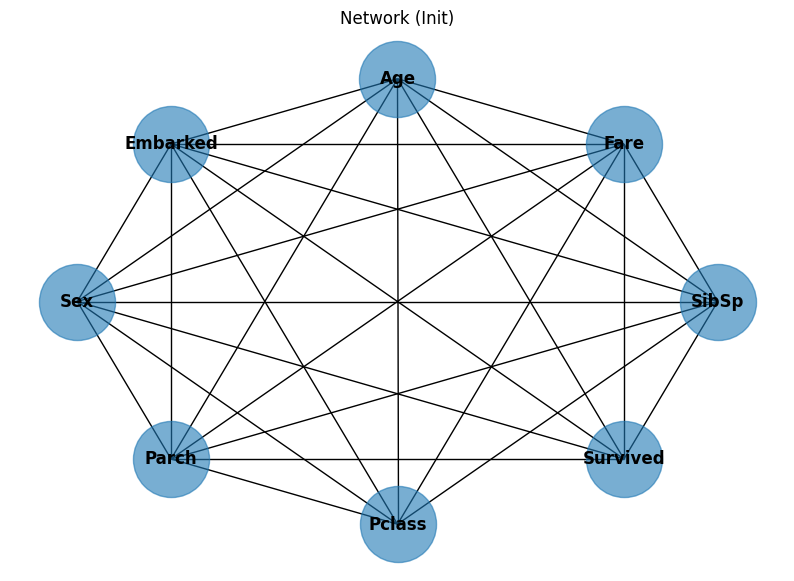

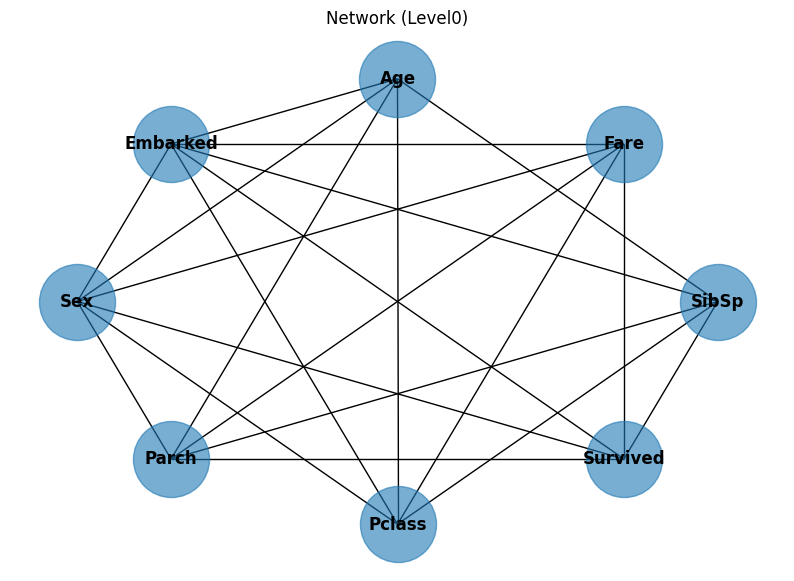

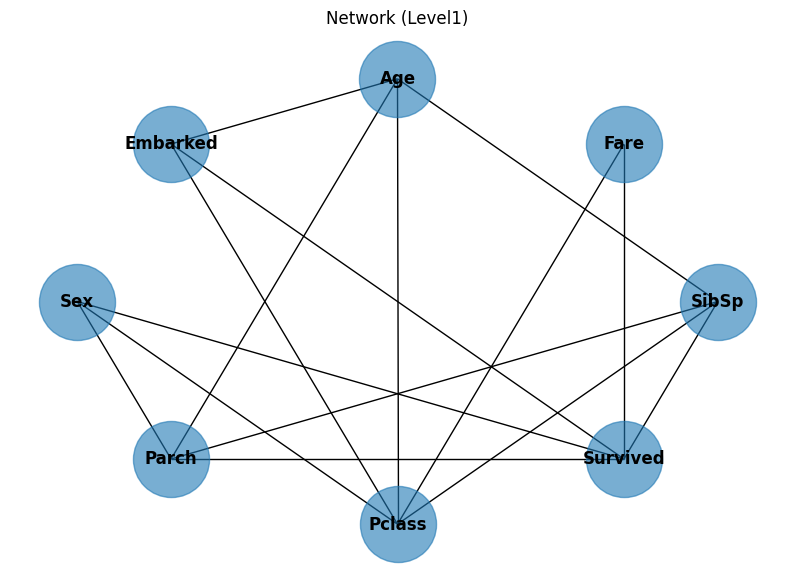

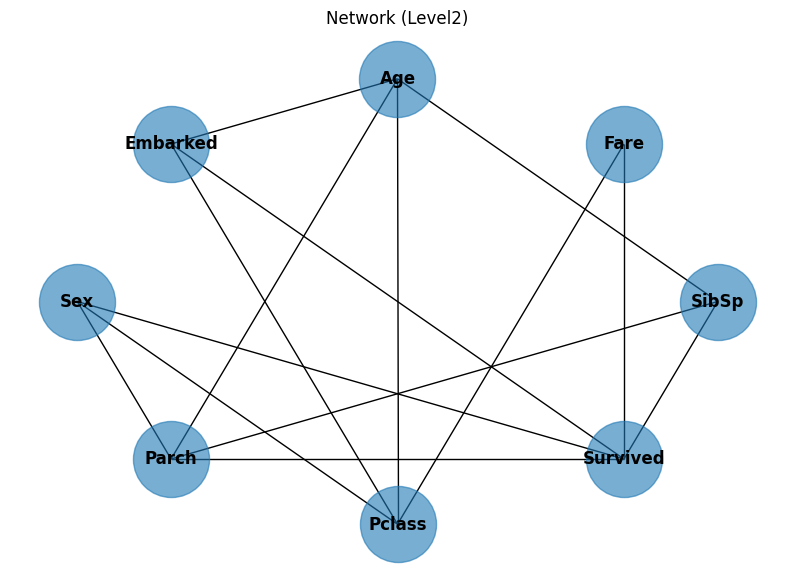

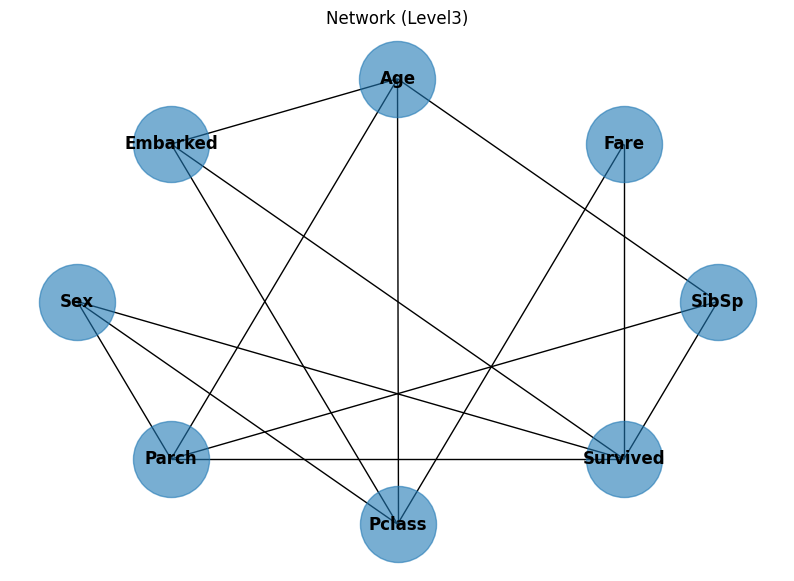

In [16]:
for label, connect_df in connect_df_dict.items():
    bayesian_network.visualize_connection(connect_df, f"Network ({label})")

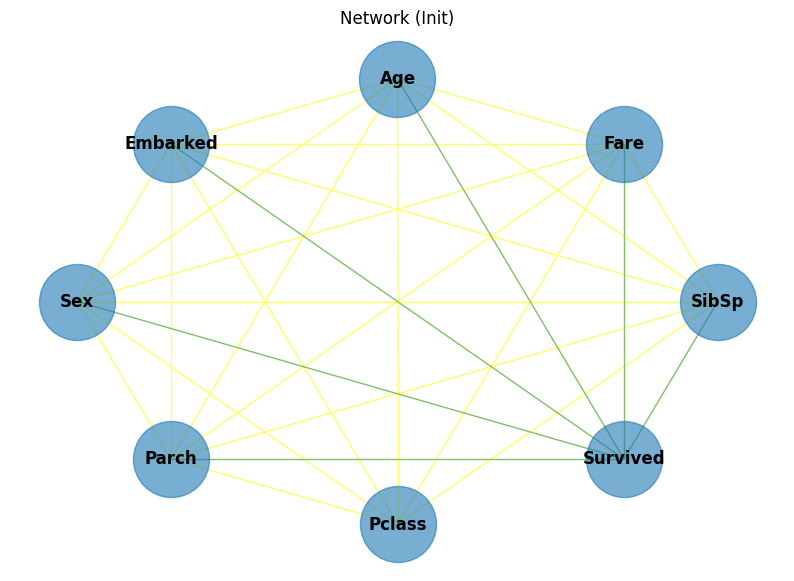

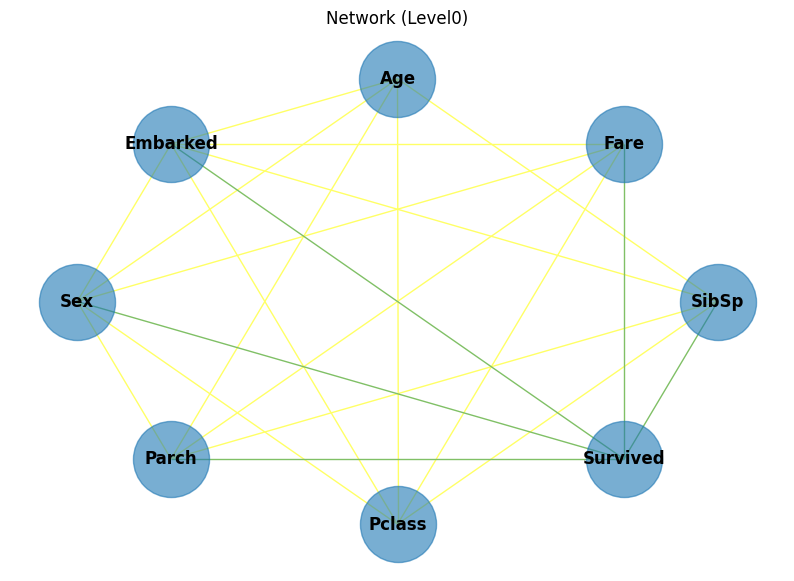

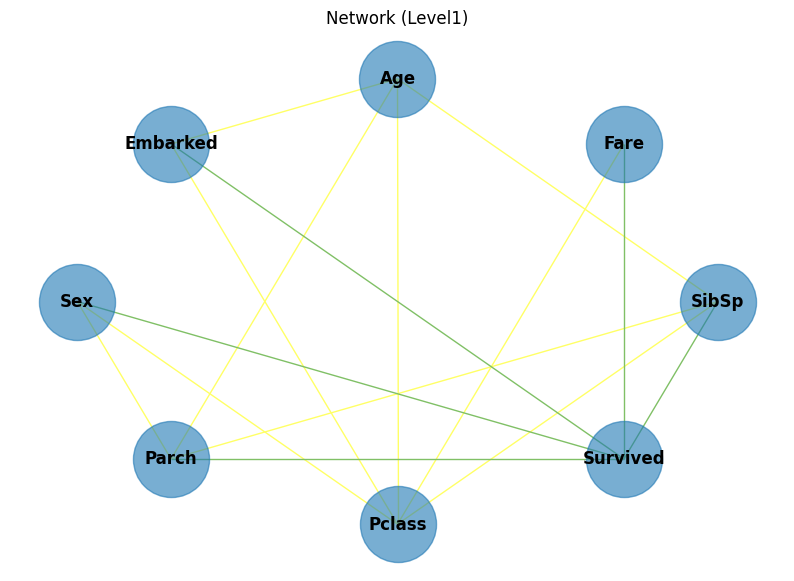

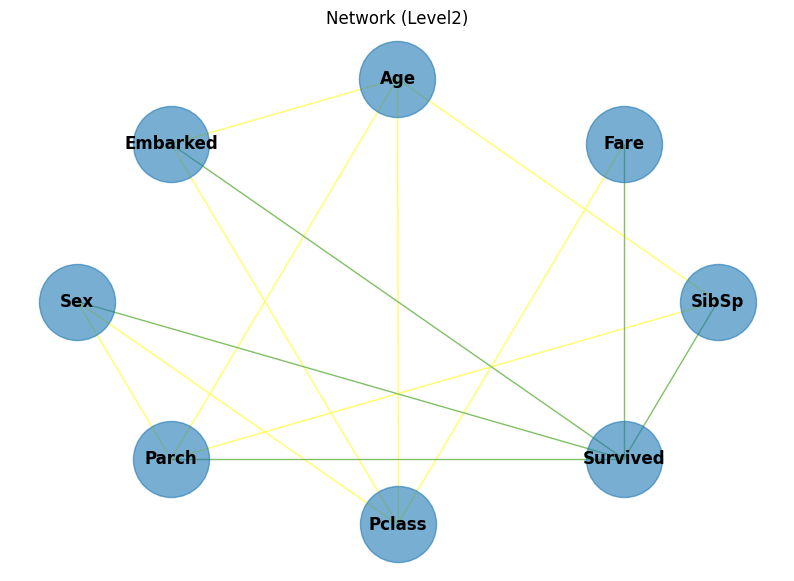

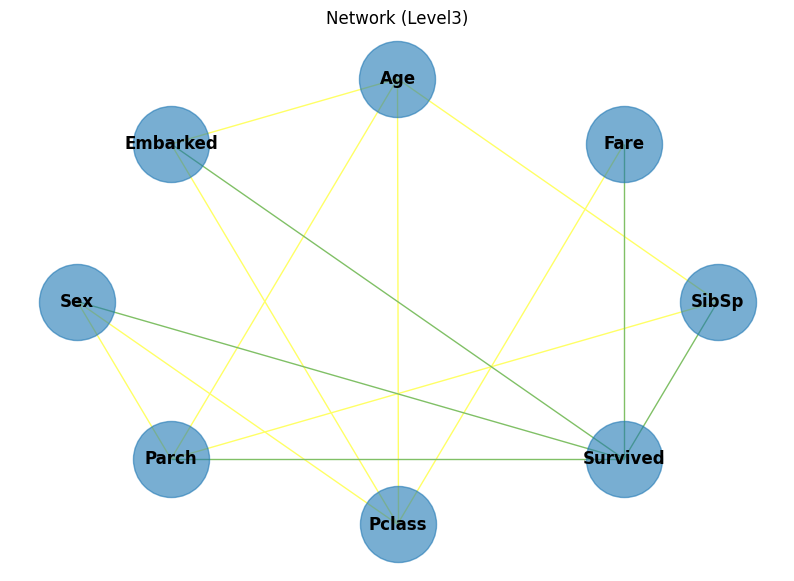

In [17]:
for label, closeness_df in closeness_df_dict.items():
    bayesian_network.visualize_closeness(closeness_df, f"Network ({label})")

| 英語 | 日本語 |
|------|--------|
| Survived | 生存 |
| Pclass | チケットクラス |
| Name | 名前 |
| Sex | 性別 |
| Age | 年齢 |
| SibSp | 兄弟姉妹/配偶者の数 |
| Parch | 親/子供の数 |
| Ticket | チケット番号 |
| Fare | 運賃 |
| Embarked | 乗船した港 |